# Description of the Dataset 
<br>

<div style="text-align: center;">
    <img src="http://img.technews.tw/wp-content/uploads/2013/07/fna-benign1.png" alt="Benign Image" style="width:300px; display:inline-block; margin-right: 20px;"/>
    <img src="http://img.technews.tw/wp-content/uploads/2013/07/fna-malignant1.png" alt="Malignant Image" style="width:300px; display:inline-block;"/>
</div>

This dataset is available here: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

__Attributes information:__
<br>
__Target Variable:__
* Diagnosis (M = malignant, B = benign)

__Ten characteristics with true values are calculated for each cell nucleus:__
* Radius (Average of distances from center to points on the perimeter)
* Consistency (standard deviation of grayscale values)
* Perimeter
* Smoothness (local variation in radius lengths)
* Compactness (perimeter ^ 2 / area - 1.0)
* Concavity (severity of the concave parts of the contour)
* Concave points (number of concave parts of the contour)
* Symmetry
* fractal dimension ('coastline approximation' - 1)

The mean, standard error and "worst" or largest of these features were computed for each image, resulting in 30 features. For instance, field 3 is `Mean Radius`, field 13 is `Radius SE`, field 23 is `Worst Radius`.

__Missing attribute values:__ `none`

__Class distribution:__ `357 benign`, `212 malignant`

# Load Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA,KernelPCA
from sklearn.manifold import TSNE, MDS

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv("data.csv") 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploratory Data Analysis

## Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

__There is no use of `id` column and there is another unnecessary column named `Unnamed: 32`. Let's drop this two columns__

In [4]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
# df.head()

## Check null values

In [5]:
# There aren't null values! 
sum(df.isnull().sum())

0

Benign			: 357
Malignant		: 212
Benign Percentage	: 62.74 %
Malignant Percentage	: 37.26 %


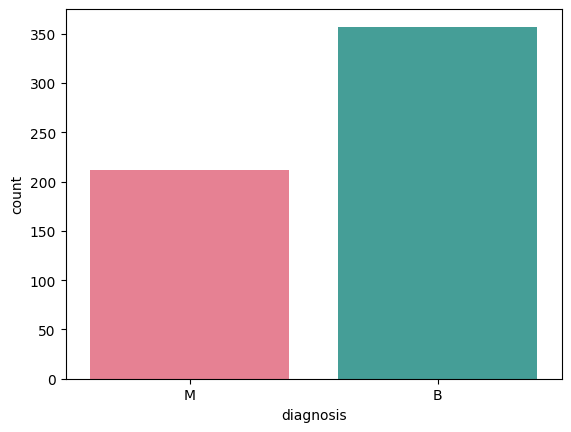

In [6]:
B, M = df['diagnosis'].value_counts()
B_percentage, M_percentage = df['diagnosis'].value_counts(normalize=True)

print('Benign\t\t\t:',B)
print('Malignant\t\t:',M)
print(f'Benign Percentage\t: {B_percentage*100:.2f} %')
print(f'Malignant Percentage\t: {M_percentage*100:.2f} %')

# count plot
sns.countplot(df['diagnosis'], palette="husl")
plt.show()

## Seperate list of features and target variable

In [7]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Scale the data
By scaling features to a similar range (e.g., between 0 and 1 or with zero mean and unit variance), we can ensure that our machine learning models perform optimally. Common scaling techniques include Min-Max scaling and standardization (Z-score scaling).

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Are there outliers?

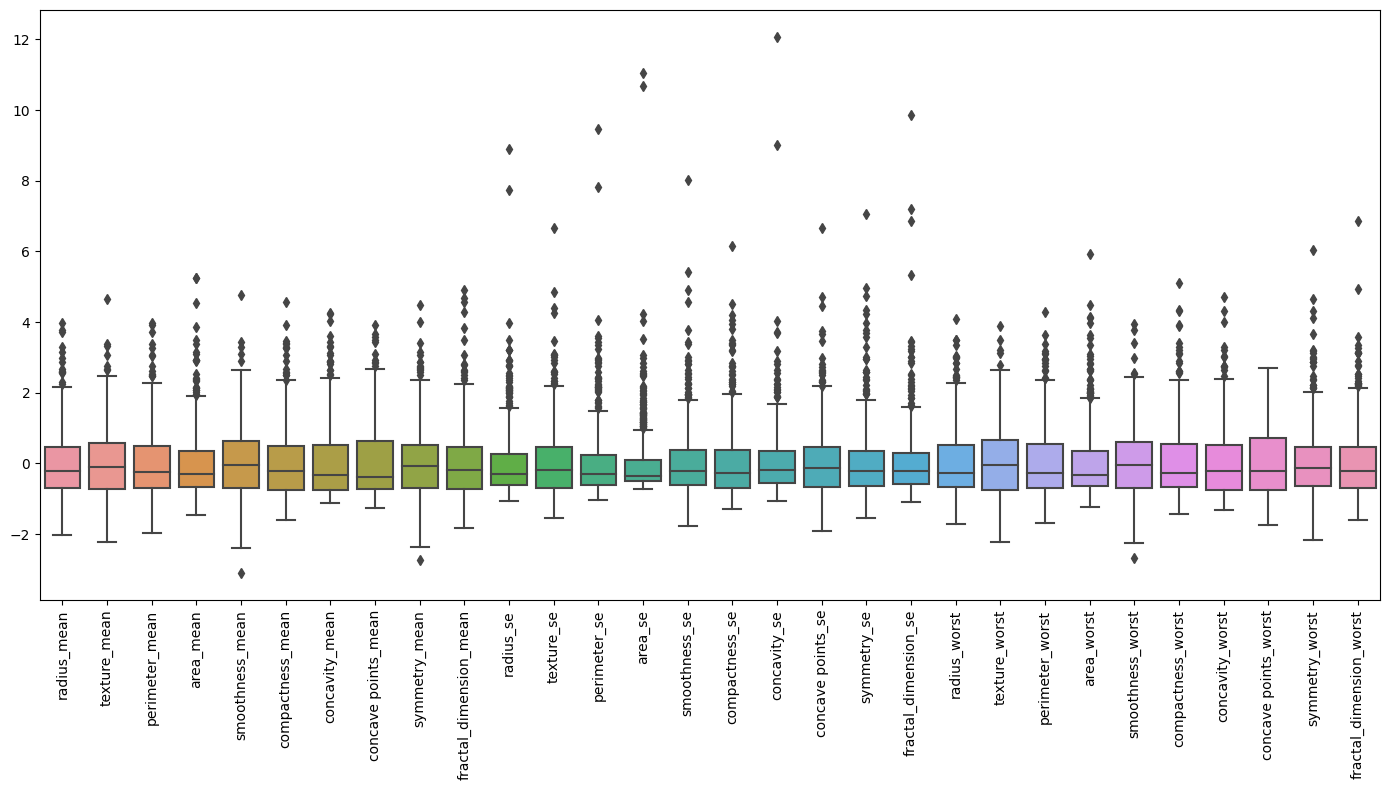

In [9]:
plt.figure(figsize=(14,8))
sns.boxplot(data = scaled_df)
plt.xticks(rotation=90)  
plt.tight_layout()

A robust statistical approach would have considered outliers all the values plotted over the value 3 (or 2.5) on the y axis. however, given the limited range of data distribution (from about -2.5 to about +11) and the availability of data is not very high (only 569 observations), it has been preferred to use an "visual" approach for detection (based on density of the points above a specific threshold) and remotion the outliers.I consider only the observations plotted under the 6 value (very far from the mean). <br>

The appropriate value to use as a threshold for outlier removal depends on the specific characteristics of the data and the context of your analysis. Here 6 is used.

__Note:__ Outliers could be indicative of incorrect data, erroneous procedures or experimental areas where some theories may not be valid Before removing them we should discuss with domino experts to understand why these points are not valid (

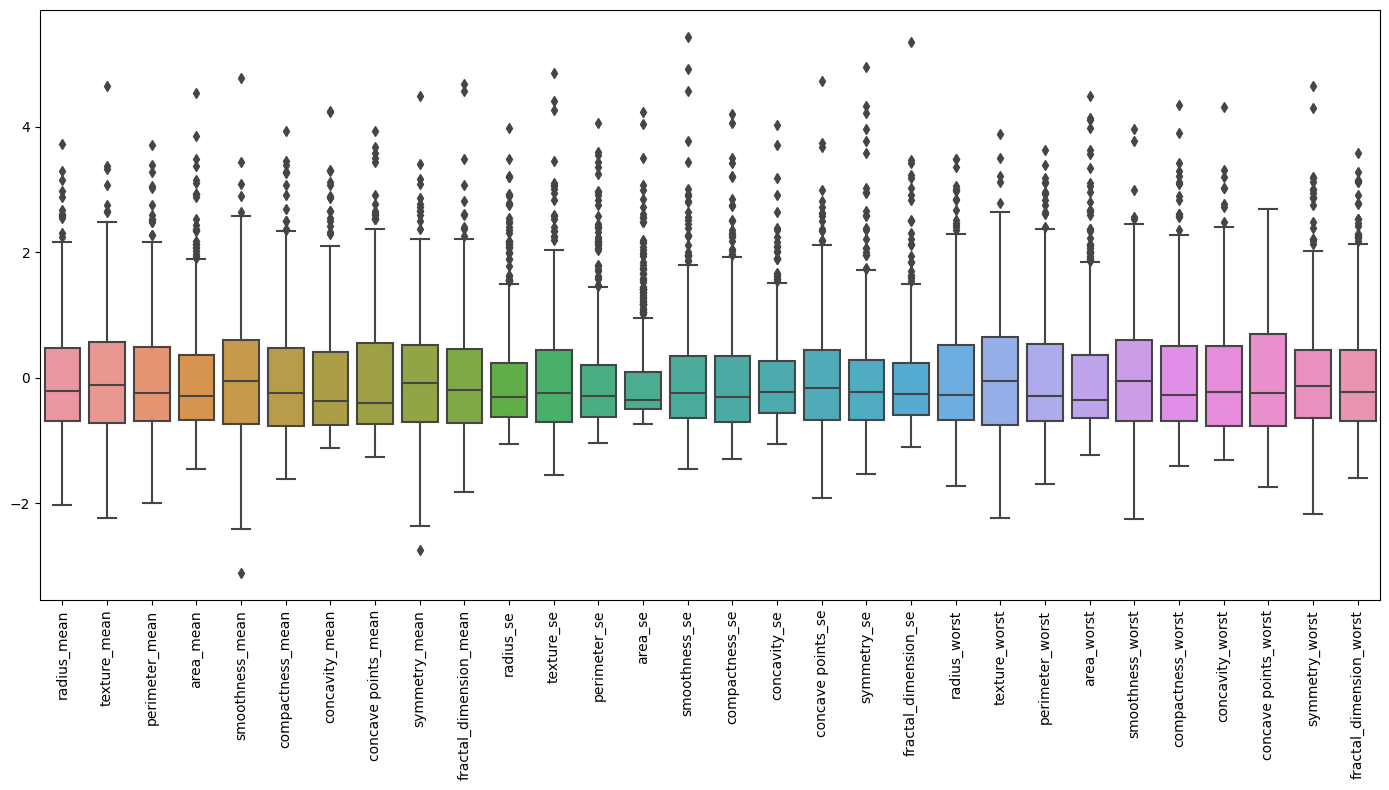

In [15]:
# the value here is 6 but it can vary depending on the nature of the data
clean_df = scaled_df[scaled_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 6).all(axis=1)]
plt.figure(figsize=(14,8))
sns.boxplot( data = clean_df )
plt.xticks(rotation=90)  
plt.tight_layout()

In [16]:
# Outliers are removed for the data

print(scaled_df.shape)
print(clean_df.shape)

print(f"Removed rows: {scaled_df.shape[0] - clean_df.shape[0]}")

(569, 30)
(557, 30)
Removed rows: 12


## Filter the y values after outlier removal and concat with the cleaned data

In the concat function we must need to use `join='inner'` otherwise the cleaned data will have the y values for those rows all the feature values will be NaN. If we use inner join then only the desired target values will be added.

In [17]:
"""
Here we have the proof if we don't use inner join during the concat operation then
the rows that we removed will be added with null values
and the shape of the data will again become the original size.
"""
df_features_y_clean = pd.concat([clean_df, y], axis=1)
indices_with_null = df_features_y_clean.index[df_features_y_clean.isnull().any(axis=1)]

# After concat find the rows that has null values
print(list(indices_with_null))

# index of the original dataset
all_index = set(scaled_df.index)
# index of the cleaned dataset
after_outlier_index = set(clean_df.index)

# Index of the rows that were considered outliers and removed
removed_indices = all_index.difference(after_outlier_index)
print(sorted(list(removed_indices)))


[3, 9, 68, 71, 78, 152, 190, 192, 212, 213, 290, 461]
[3, 9, 68, 71, 78, 152, 190, 192, 212, 213, 290, 461]


#### This is just for experimental purpose. Now let's do it using inner join and continue the analysis.

In [18]:
df_features_y_clean = pd.concat([clean_df, y], axis=1, join = 'inner')
print(df_features_y_clean.shape)

(557, 31)


## Check the class distribution now with cleaned data



Benign			: 352
Malignant		: 205
Benign Percentage	: 63.20 %
Malignant Percentage	: 36.80 %


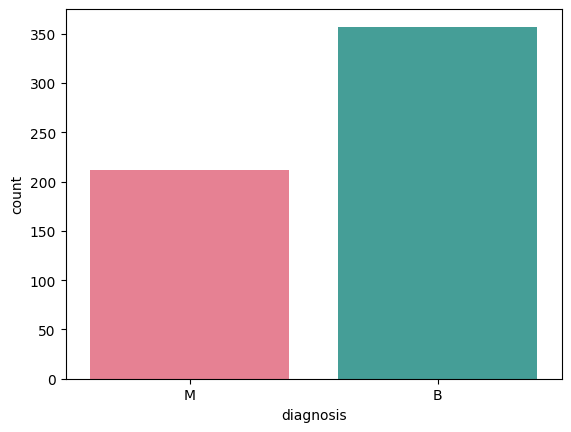

In [19]:
B, M = df_features_y_clean['diagnosis'].value_counts()
B_percentage, M_percentage = df_features_y_clean['diagnosis'].value_counts(normalize=True)

print('Benign\t\t\t:',B)
print('Malignant\t\t:',M)
print(f'Benign Percentage\t: {B_percentage*100:.2f} %')
print(f'Malignant Percentage\t: {M_percentage*100:.2f} %')

# count plot
sns.countplot(df['diagnosis'], palette="husl")
plt.show()

__In the original dataset__ <br>
Benign Percentage	    : 62.74 %<br>
Malignant Percentage	: 37.26 %<br><br>
__After removing it's__<br>
Benign Percentage	    : 63.20 %<br>
Malignant Percentage	: 36.80 %<br><br>
The proportion is maintained.